Import all the necessary libraries

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [295]:
df=pd.read_csv('HR_attrition_rate.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [296]:
df.shape

(1470, 35)

The given dataset contains 1470 rows & 35 column

In [297]:
#checking column name

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [298]:
#checking the datatypes of column

df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [299]:
df.columns.groupby(df.dtypes)

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

OBSERVATION:-
    
1.Most columns are of int64 type except few

2.Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,Overtime are of object type

3.In all we have 35 features consisting of both the categorical as well as the numerical features. 

4.The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

# Checking missing values

In [301]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

 We can also see this with the help of visualization for better clarity

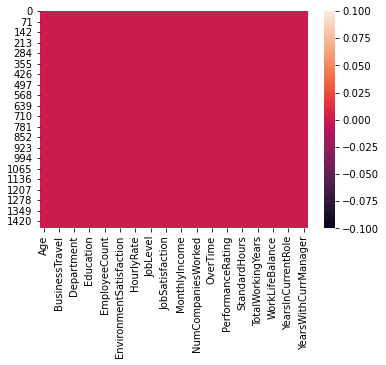

In [302]:
sns.heatmap(df.isnull())

Observation

we find that there are no missing values present in the dataset

# Summary Statistics

In [303]:
#it will give information about all the numerical column
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [304]:
#checking unique values of target column

df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

we clearly get the idea that it is a classification type of problem

In [305]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [306]:
df['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [307]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [308]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

we notice that these 4 columns are not of much importance ,that's why we can drop them

In [309]:
df.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [310]:
df['Attrition']=df.Attrition.map({'Yes':0,'No':1})
df['Attrition'].value_counts()

1    1233
0     237
Name: Attrition, dtype: int64

# Check Corelation

In [311]:
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,0.056652,-0.077924,0.031373,0.103369,0.006846,0.130016,0.169105,0.103481,...,-0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
DailyRate,0.010661,0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


Here we see corelation between various column

For better clarity ,we check it via VISUALISATION

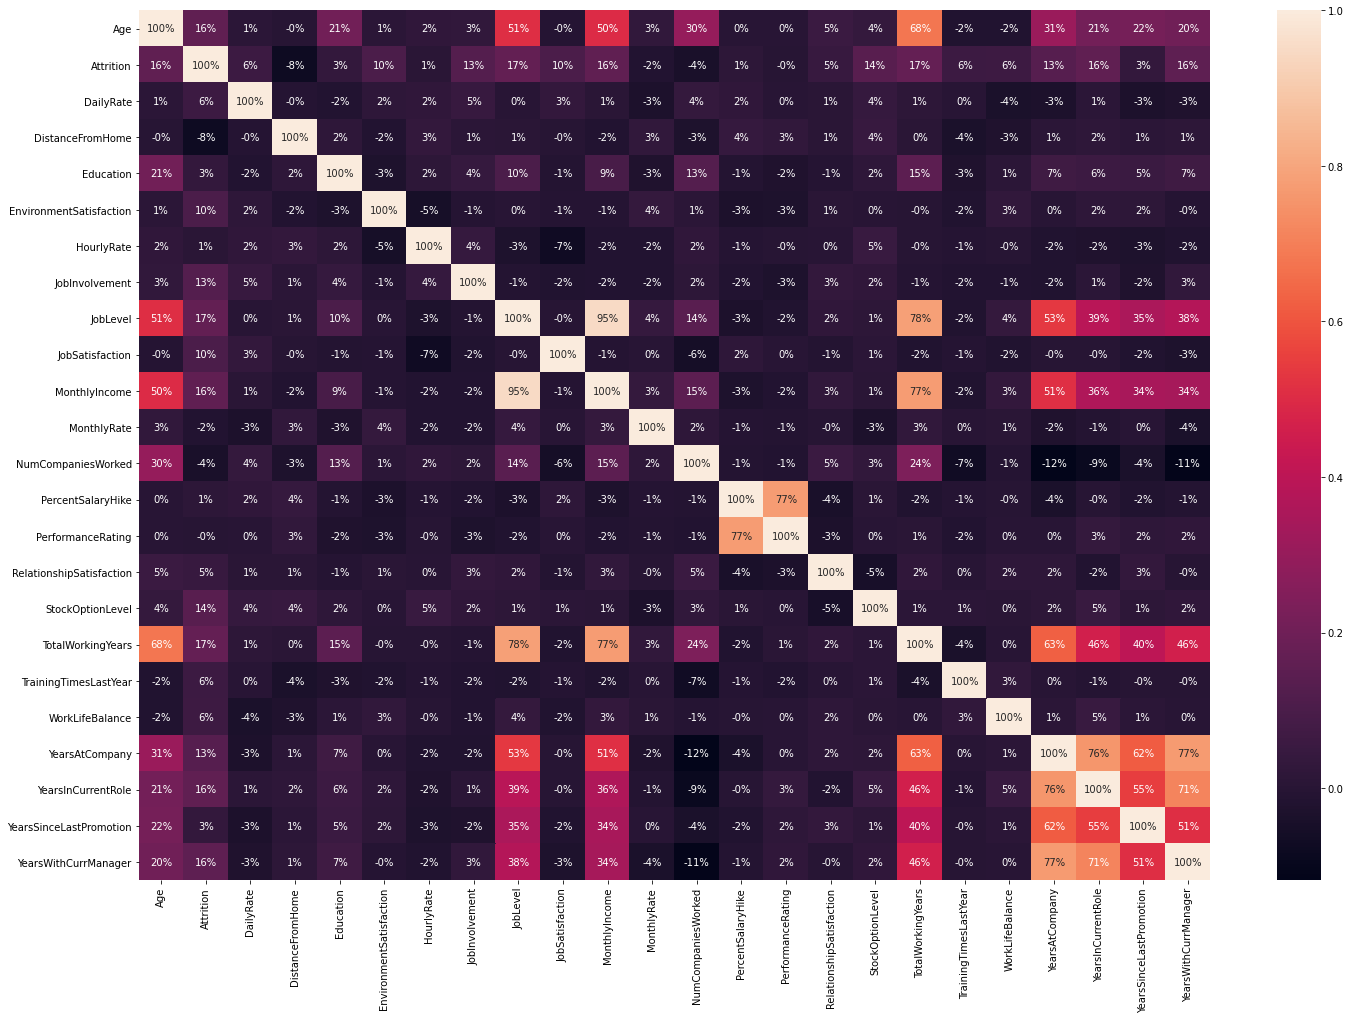

In [312]:
#Visualising the corelation

plt.figure(figsize=(24,16))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

OBSERVATION:-

1.JobLevel,Totalworkingyear,Monthly Income is highly related to Age as aged employees will generally tend to occupy higher positions in the company & will get higher salary.  

2.MonthlyIncome is very strongly related to joblevel as higher the post,more will be income.

3.PerformanceRating is highly related to PercentSalaryhike.

4.YearsWithCurrManager is highly related to YearsAtCompany.

5.TotalWorkingYears is highly related to JobLevel as senior employees must have worked for a larger     span of time.

In [313]:
# we can drop some highly corelated features as they add redundancy to the model 

# VISUALISATION

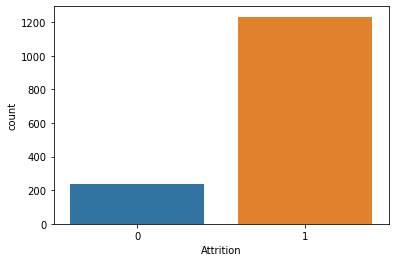

In [314]:
sns.countplot(df['Attrition'],data=df)

The graph shows that tendency of employeee leaving the company is very less than that,not leaving the company

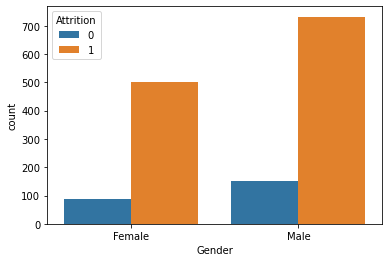

In [315]:
sns.countplot(df['Gender'],hue=df['Attrition'])

from above graph we can see that nearly equal percentage of both men & women want to leave the company

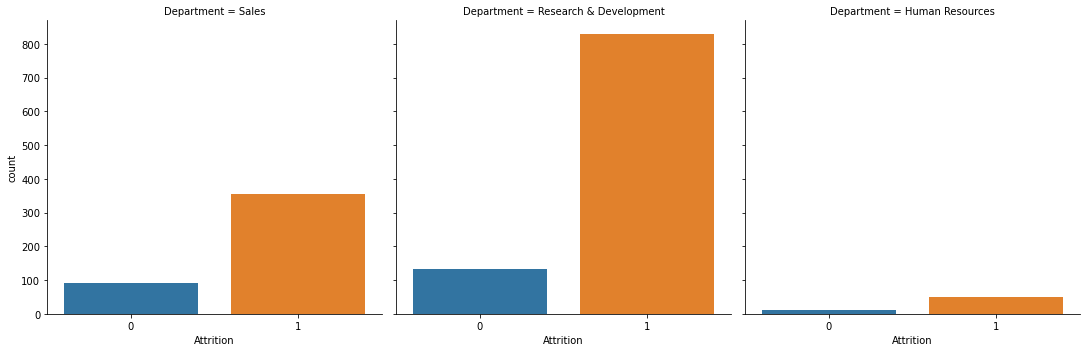

In [316]:
sns.factorplot(kind='count',x='Attrition',col='Department',data=df)

From above graph we notice that ,out of the total employee in all department,very few employee wants to leave the company..

In [317]:
#crosstab will give clear idea 

pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') 

# set normalize=index to view rowwise %.

Attrition,0,1
Department,,
Human Resources,0.190476,0.809524
Research & Development,0.138398,0.861602
Sales,0.206278,0.793722
All,0.161224,0.838776


16% employee of different department want to leave the company

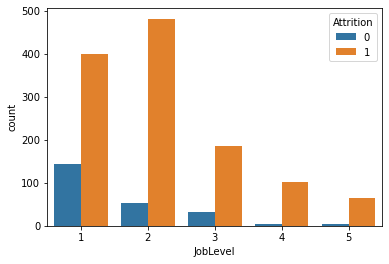

In [318]:
sns.countplot('JobLevel',hue='Attrition',data=df)

lower is the job level ,higher is the chane of leaving

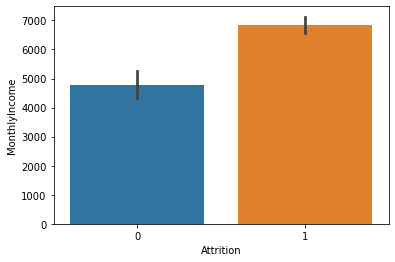

In [319]:
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)

employees who are probably not earning well  want to change the company.

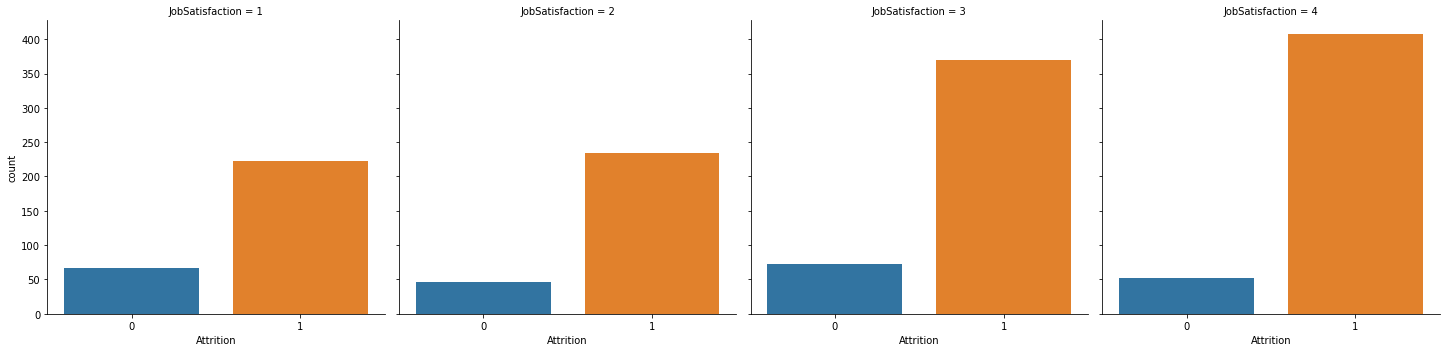

In [320]:
sns.factorplot(kind='count',x='Attrition',col='JobSatisfaction',data=df)

In [321]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index') 


Attrition,0,1
JobSatisfaction,,
1,0.228374,0.771626
2,0.164286,0.835714
3,0.165158,0.834842
4,0.113290,0.886710
All,0.161224,0.838776


Higher is the job satisfaction level(.ie=4),less is the chance of leaving the company

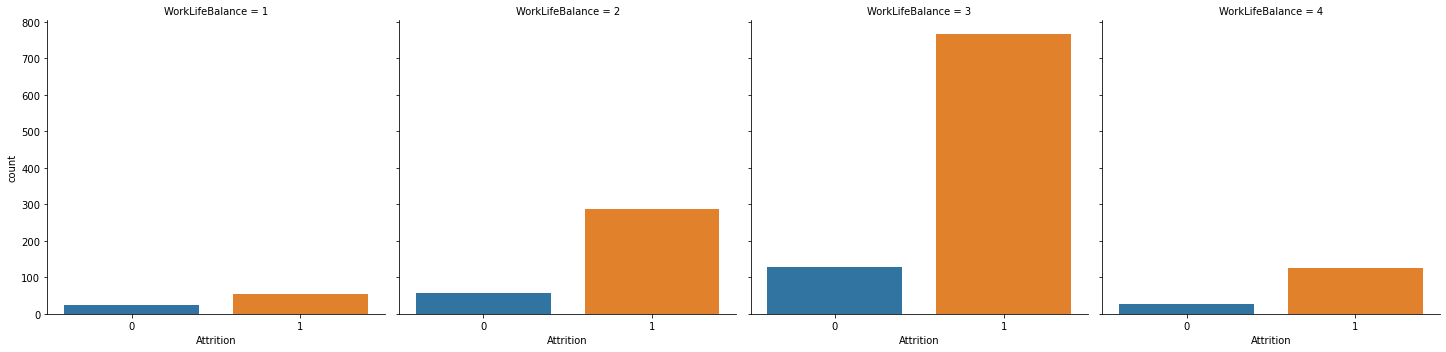

In [322]:
sns.factorplot(kind='count',x='Attrition',col='WorkLifeBalance',data=df)

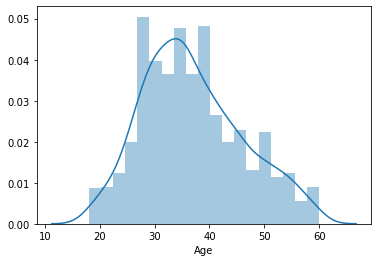

In [323]:
sns.distplot(df.Age) 

most of the employee are of age between 30-40

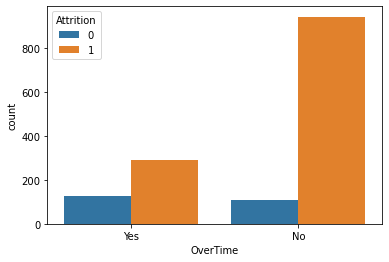

In [324]:
sns.countplot(df['OverTime'],hue='Attrition',data=df)

very few people(doing or not doing overtime) want to leave the company

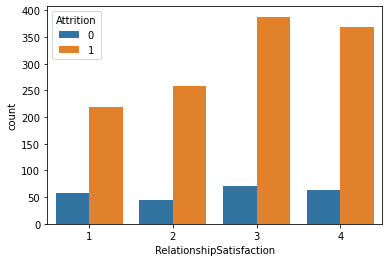

In [325]:
sns.countplot(df['RelationshipSatisfaction'],hue=df['Attrition'],data=df)

In [326]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index') 


Attrition,0,1
RelationshipSatisfaction,,
1,0.206522,0.793478
2,0.148515,0.851485
3,0.154684,0.845316
4,0.148148,0.851852
All,0.161224,0.838776


relationship satisfaction doesn't affect much in attrition

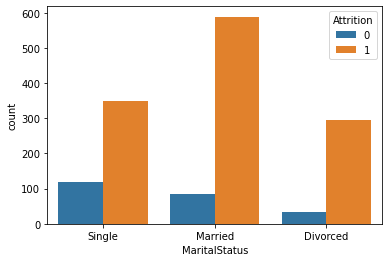

In [327]:
sns.countplot(df['MaritalStatus'],hue=df['Attrition'],data=df)

from above we see that,single people leaves job most frequently

# plotting outliers

Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
Attrition                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Education                   AxesSubplot(0.656429,0.772143;0.110714x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.789286,0.772143;0.110714x0.107857)
HourlyRate                     AxesSubplot(0.125,0.642714;0.110714x0.107857)
JobInvolvement              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
JobLevel                    AxesSubplot(0.390714,0.642714;0.110714x0.107857)
JobSatisfaction             AxesSubplot(0.523571,0.642714;0.110714x0.107857)
MonthlyIncome               AxesSubplot(0.656429,0.642714;0.110714x0.107857)
MonthlyRate                 AxesSubplot(0.789286,0.642714;0.110714x0.107857)
NumCompaniesWorked             AxesSubplot(0.125,0.513286;0.110714x0.107857)

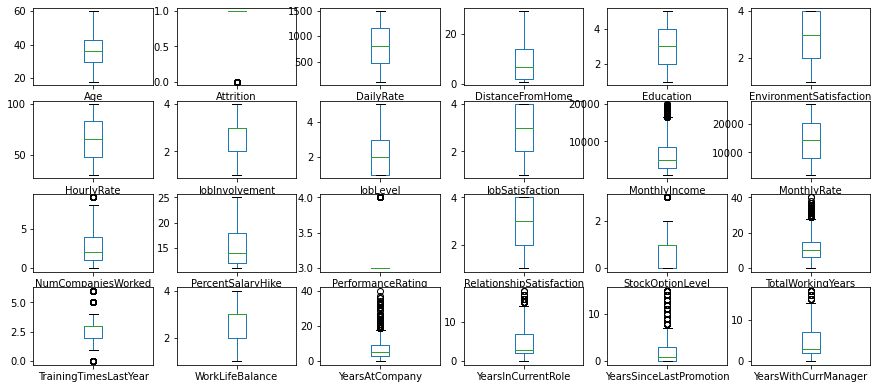

In [328]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(15,10))

from above we see that ,outliers are present in the dataset

In [329]:
#dropping unnecessary columns
df.drop(['Gender','OverTime','RelationshipSatisfaction','TrainingTimesLastYear','HourlyRate'],axis=1,inplace=True)

In [330]:
from sklearn.preprocessing import LabelEncoder

In [331]:
le=LabelEncoder()
list=['Attrition', 'BusinessTravel', 'Department', 'EducationField','JobRole','MaritalStatus']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))
    

In [332]:
df.skew()

Age                        0.413286
Attrition                 -1.844366
BusinessTravel            -1.439006
DailyRate                 -0.003519
Department                 0.172231
DistanceFromHome           0.958118
Education                 -0.289681
EducationField             0.550371
EnvironmentSatisfaction   -0.321654
JobInvolvement            -0.498419
JobLevel                   1.025401
JobRole                   -0.357270
JobSatisfaction           -0.329672
MaritalStatus             -0.152175
MonthlyIncome              1.369817
MonthlyRate                0.018578
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
PerformanceRating          1.921883
StockOptionLevel           0.968980
TotalWorkingYears          1.117172
WorkLifeBalance           -0.552480
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

In [333]:
#remove skewness
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])


In [334]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(1470, 26)
(1459, 26)


In [335]:
x=df_new.drop(['Attrition'],axis=1)
x.shape

(1459, 25)

In [336]:
y=df_new['Attrition']

In [337]:
from sklearn.preprocessing import StandardScaler

In [338]:
sc=StandardScaler()

In [339]:
x=sc.fit_transform(x)
x=pd.DataFrame(x)


In [340]:
max_accuracy_score=0
for r_state in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg_pred=lg.predict(x_test)
    accuracy_scr=accuracy_score(y_test,lg_pred)
    if accuracy_scr>max_accuracy_score:
        max_accuracy_score=accuracy_scr
        final_r_state=r_state
        
print('max accuracy score corresponding to ',final_r_state,'is',max_accuracy_score)

max accuracy score corresponding to  68 is 0.9041095890410958


In [341]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (1167, 25)
x_test_shape: (292, 25)
y_train_shape: (1167,)
y_test_shape: (292,)


In [342]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=68)

In [343]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

accuracy_score: 0.9041095890410958
[[  9  27]
 [  1 255]]
              precision    recall  f1-score   support

           0       0.90      0.25      0.39        36
           1       0.90      1.00      0.95       256

    accuracy                           0.90       292
   macro avg       0.90      0.62      0.67       292
weighted avg       0.90      0.90      0.88       292



# Decision Tree Classifier

In [344]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'criterion': 'gini'}


In [345]:
#decisiontreeclassifier

dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,preddtc))
print('\n')
print(confusion_matrix(y_test,preddtc))
print('\n')
print(classification_report(y_test,preddtc))

accuracy_score: 0.7876712328767124


[[  7  29]
 [ 33 223]]


              precision    recall  f1-score   support

           0       0.17      0.19      0.18        36
           1       0.88      0.87      0.88       256

    accuracy                           0.79       292
   macro avg       0.53      0.53      0.53       292
weighted avg       0.80      0.79      0.79       292



# SVC

In [346]:
#gridsearchcv
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)


print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [347]:
#svc with best parameters

svc=SVC(kernel='rbf',C=1)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predsvc))
print('\n')
print(confusion_matrix(y_test,predsvc))
print('\n')
print(classification_report(y_test,predsvc))

accuracy_score: 0.886986301369863


[[  3  33]
 [  0 256]]


              precision    recall  f1-score   support

           0       1.00      0.08      0.15        36
           1       0.89      1.00      0.94       256

    accuracy                           0.89       292
   macro avg       0.94      0.54      0.55       292
weighted avg       0.90      0.89      0.84       292



# KNeighbors Classifier

In [348]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predknn))
print('\n')
print(confusion_matrix(y_test,predknn))
print('\n')
print(classification_report(y_test,predknn))

accuracy_score: 0.8801369863013698


[[  5  31]
 [  4 252]]


              precision    recall  f1-score   support

           0       0.56      0.14      0.22        36
           1       0.89      0.98      0.94       256

    accuracy                           0.88       292
   macro avg       0.72      0.56      0.58       292
weighted avg       0.85      0.88      0.85       292



# Naive Bayes

In [349]:
gnb=GaussianNB()
from sklearn.model_selection import cross_val_score
cross_val_score(gnb,x,y,cv=5).mean()

0.7964364731911688

In [350]:

gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predgnb))
print('\n')
print(confusion_matrix(y_test,predgnb))
print('\n')
print(classification_report(y_test,predgnb))

accuracy_score: 0.8321917808219178


[[ 20  16]
 [ 33 223]]


              precision    recall  f1-score   support

           0       0.38      0.56      0.45        36
           1       0.93      0.87      0.90       256

    accuracy                           0.83       292
   macro avg       0.66      0.71      0.68       292
weighted avg       0.86      0.83      0.85       292



# ensemble technique

In [351]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=50,random_state=42)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf,labels=[0,1]))

0.8767123287671232
[[  3  33]
 [  3 253]]
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        36
           1       0.88      0.99      0.93       256

    accuracy                           0.88       292
   macro avg       0.69      0.54      0.54       292
weighted avg       0.84      0.88      0.84       292



In [352]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8904109589041096
[[ 16  20]
 [ 12 244]]
              precision    recall  f1-score   support

           0       0.57      0.44      0.50        36
           1       0.92      0.95      0.94       256

    accuracy                           0.89       292
   macro avg       0.75      0.70      0.72       292
weighted avg       0.88      0.89      0.88       292



Logistic Regression is working well because it gives the best accuracy score

# AUC-ROC curve

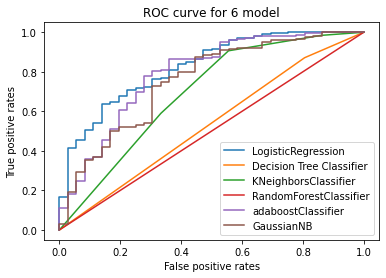

LG AUC score 0.8253038194444445
DTC AUC SCORE 0.5327690972222222
KNN auc score 0.6911892361111112
Random forest classifier 0.7286783854166666
Adaboost classifier 0.7914496527777778
Gaussian NB 0.7530381944444445


In [353]:
lgpred_prob=lg.predict_proba(x_test)[:,1]
dtcpred_prob=dtc.predict_proba(x_test)[:,1]
knnpred_prob=knn.predict_proba(x_test)[:,1]
rfpred_prob=rf.predict_proba(x_test)[:,1]
adpred_prob=ad.predict_proba(x_test)[:,1]
gnbpred_prob=gnb.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
lg_tpr,lg_fpr,lg_thresholds=roc_curve(y_test,lgpred_prob)
dtc_tpr,dtc_fpr,dtc_thresholds=roc_curve(y_test,dtcpred_prob)
knn_tpr,knn_fpr,knn_thresholds=roc_curve(y_test,knnpred_prob)
rf_tpr,rf_fpr,rf_threshold=roc_curve(y_test,rfpred_prob)
ad_tpr,ad_fpr,ad_threshold=roc_curve(y_test,adpred_prob)
gnb_tpr,gnb_fpr,gnb_threshold=roc_curve(y_test,gnbpred_prob)

plt.plot(lg_tpr,lg_fpr,label='LogisticRegression')
plt.plot(dtc_tpr,dtc_fpr,label ='Decision Tree Classifier')
plt.plot(knn_tpr,knn_fpr,label='KNeighborsClassifier')
plt.plot(rf_tpr,rf_tpr,label='RandomForestClassifier')
plt.plot(ad_tpr,ad_fpr,label='adaboostClassifier')
plt.plot(gnb_tpr,gnb_fpr,label='GaussianNB')


plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve for 6 model')
plt.legend(loc='best')
plt.show()

from sklearn.metrics import roc_auc_score
print('LG AUC score',roc_auc_score(y_test,lgpred_prob))
print('DTC AUC SCORE',roc_auc_score(y_test,dtcpred_prob))
print('KNN auc score',roc_auc_score(y_test,knnpred_prob))
print('Random forest classifier',roc_auc_score(y_test,rfpred_prob))
print('Adaboost classifier',roc_auc_score(y_test,adpred_prob))
print('Gaussian NB',roc_auc_score(y_test,gnbpred_prob))

out of all ,Logistic Regression gives the best auc score

In [354]:
#Saving the best model

import joblib

joblib.dump(lg,'HRanalytics.pkl')

['HRanalytics.pkl']